In [1]:
import selfies as sf
from rdkit import Chem

benzene = 'c1ccccc1'

In [2]:
encoded_selfies = sf.encoder(benzene) 
encoded_selfies

'[C][=C][C][=C][C][=C][Ring1][Branch1_2]'

In [3]:
decoded_smiles = sf.decoder(encoded_selfies) 
decoded_smiles

'C1=CC=CC=C1'

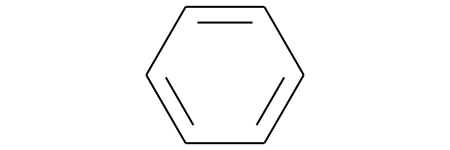

In [4]:
Chem.MolFromSmiles(decoded_smiles)

In [5]:
Chem.MolToSmiles(Chem.MolFromSmiles(decoded_smiles))

'c1ccccc1'

In [6]:
can_smiles = Chem.CanonSmiles(benzene)
can_decoded_smiles = Chem.CanonSmiles(decoded_smiles)
can_smiles == can_decoded_smiles

True

In [7]:
default_constraints = sf.get_semantic_constraints()
default_constraints

{'H': 1,
 'F': 1,
 'Cl': 1,
 'Br': 1,
 'I': 1,
 'O': 2,
 'O+1': 3,
 'O-1': 1,
 'N': 3,
 'N+1': 4,
 'N-1': 2,
 'C': 4,
 'C+1': 5,
 'C-1': 3,
 'S': 6,
 'S+1': 7,
 'S-1': 5,
 'P': 7,
 'P+1': 8,
 'P-1': 6,
 '?': 8}

In [8]:
#自定义语义限制
new_constraints = default_constraints
new_constraints['Li'] = 1
new_constraints['S'] = 2

sf.set_semantic_constraints(new_constraints)
sf.get_semantic_constraints()

{'H': 1,
 'F': 1,
 'Cl': 1,
 'Br': 1,
 'I': 1,
 'O': 2,
 'O+1': 3,
 'O-1': 1,
 'N': 3,
 'N+1': 4,
 'N-1': 2,
 'C': 4,
 'C+1': 5,
 'C-1': 3,
 'S': 2,
 'S+1': 7,
 'S-1': 5,
 'P': 7,
 'P+1': 8,
 'P-1': 6,
 '?': 8,
 'Li': 1}

In [9]:
symbols_benzene = list(sf.split_selfies(encoded_selfies))
symbols_benzene

['[C]', '[=C]', '[C]', '[=C]', '[C]', '[=C]', '[Ring1]', '[Branch1_2]']

In [10]:
import numpy as np
import pandas as pd
import urllib.request 
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors, PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

url = 'https://raw.githubusercontent.com/onecoinbuybus/Database_chemoinformatics/master/smiles_cas_N6512.smi'
urllib.request.urlretrieve(url, 'ames.txt') 
df = pd.read_csv('ames.txt',header=None, sep='\t') 
df.columns = ['smiles', 'CAS_NO', 'activity']
PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='smiles')

none_list=[]
for i in range(df.shape[0]):
    if Chem.MolFromSmiles(df['smiles'][i]) is None:
        none_list.append(i)

df=df.drop(none_list)

RDKit ERROR: [16:50:44] SMILES Parse Error: syntax error while parsing: NNC(=O)CNC(=O)\C=N\#N
RDKit ERROR: [16:50:44] SMILES Parse Error: Failed parsing SMILES 'NNC(=O)CNC(=O)\C=N\#N' for input: 'NNC(=O)CNC(=O)\C=N\#N'
RDKit ERROR: [16:50:44] SMILES Parse Error: syntax error while parsing: O=C1NC(=O)\C(=N/#N)\C=N1
RDKit ERROR: [16:50:44] SMILES Parse Error: Failed parsing SMILES 'O=C1NC(=O)\C(=N/#N)\C=N1' for input: 'O=C1NC(=O)\C(=N/#N)\C=N1'
RDKit ERROR: [16:50:44] SMILES Parse Error: syntax error while parsing: NC(=O)CNC(=O)\C=N\#N
RDKit ERROR: [16:50:44] SMILES Parse Error: Failed parsing SMILES 'NC(=O)CNC(=O)\C=N\#N' for input: 'NC(=O)CNC(=O)\C=N\#N'
RDKit ERROR: [16:50:44] SMILES Parse Error: syntax error while parsing: CCCCN(CC(O)C1=C\C(=N/#N)\C(=O)C=C1)N=O
RDKit ERROR: [16:50:44] SMILES Parse Error: Failed parsing SMILES 'CCCCN(CC(O)C1=C\C(=N/#N)\C(=O)C=C1)N=O' for input: 'CCCCN(CC(O)C1=C\C(=N/#N)\C(=O)C=C1)N=O'
RDKit ERROR: [16:50:44] SMILES Parse Error: syntax error while pars

In [11]:
encoded_selfies = sf.encoder('Cc1cccc(c1C)[N+](=O)[O-]') 
encoded_selfies

'[C][C][=C][C][=C][C][Branch1_2][Branch1_1][=C][Ring1][Branch1_2][C][N+expl][Branch1_2][C][=O][O-expl]'

In [12]:
encoded_selfies = []
for i in df['smiles'].tolist():
    encoded_selfies.append(sf.encoder(i[:-1])+'[nop]')

In [13]:
encoded_selfies[0]

'[O][=C][C][=C][C][=C][C][=C][Ring1][Branch1_2][C][Branch1_2][C][=O][C][=C][Ring1][O][C][=C][C][=C][Ring1][Branch1_2][NHexpl][C][=C][C][Branch1_2][C][=O][C][=C][C][=C][C][=C][Ring1][Branch1_2][C][Branch1_2][C][=O][C][Ring1][N][=C][NHexpl][C][=C][C][Branch1_2][C][=O][C][=C][C][=C][C][=C][Ring1][Branch1_2][C][Branch1_2][C][=O][C][Ring1][N][=C][C][=C][Ring1][S][C][Ring2][Ring1][Ring1][=C][Ring2][Ring2][Ring2][Ring2][Ring1][P][nop]'

In [14]:
alphabet = sf.get_alphabet_from_selfies(encoded_selfies)
alphabet.add('[nop]')  # '[nop]' is a special padding symbol
alphabet = list(sorted(alphabet))
print(alphabet)

['[#C]', '[#N]', '[#O+expl]', '[/Br]', '[/C]', '[/Cl]', '[/F]', '[/N]', '[/O]', '[/S]', '[=C]', '[=N+expl]', '[=N-expl]', '[=N]', '[=O+expl]', '[=O]', '[=P]', '[=S+expl]', '[=S]', '[B]', '[Br]', '[Branch1_1]', '[Branch1_2]', '[Branch1_3]', '[Branch2_1]', '[Branch2_2]', '[Branch2_3]', '[C-expl]', '[C@@Hexpl]', '[C@@expl]', '[C@Hexpl]', '[C@expl]', '[CH-expl]', '[CH2-expl]', '[C]', '[Cl]', '[Expl/Ring1]', '[Expl/Ring2]', '[Expl=Ring1]', '[Expl=Ring2]', '[Expl\\Ring1]', '[Expl\\Ring2]', '[F]', '[I]', '[N+expl]', '[N-expl]', '[N@+expl]', '[N@@+expl]', '[NHexpl]', '[N]', '[O-expl]', '[O]', '[P+expl]', '[P@@expl]', '[P@expl]', '[P]', '[Ring1]', '[Ring2]', '[S+expl]', '[S]', '[Seexpl]', '[Siexpl]', '[\\Br]', '[\\C@@Hexpl]', '[\\C@Hexpl]', '[\\C]', '[\\Cl]', '[\\F]', '[\\N+expl]', '[\\N]', '[\\O]', '[\\S]', '[nop]']


In [15]:
pad_to_len = max(sf.len_selfies(s) for s in encoded_selfies)  
symbol_to_idx = {s: i for i, s in enumerate(alphabet)}
pad_to_len

348

In [16]:
encoded_selfies[0]

'[O][=C][C][=C][C][=C][C][=C][Ring1][Branch1_2][C][Branch1_2][C][=O][C][=C][Ring1][O][C][=C][C][=C][Ring1][Branch1_2][NHexpl][C][=C][C][Branch1_2][C][=O][C][=C][C][=C][C][=C][Ring1][Branch1_2][C][Branch1_2][C][=O][C][Ring1][N][=C][NHexpl][C][=C][C][Branch1_2][C][=O][C][=C][C][=C][C][=C][Ring1][Branch1_2][C][Branch1_2][C][=O][C][Ring1][N][=C][C][=C][Ring1][S][C][Ring2][Ring1][Ring1][=C][Ring2][Ring2][Ring2][Ring2][Ring1][P][nop]'

In [17]:
symbol_to_int = dict((c, i) for i, c in enumerate(alphabet))

integer_encoded_all=[]
for i in encoded_selfies:
    symbol_list = sf.split_selfies(i)
    integer_encoded = [symbol_to_int[symbol] for symbol in symbol_list]
    integer_encoded_all.append(integer_encoded)

In [18]:
def vectorize_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results

In [19]:
integer_encoded_all[0]

[51,
 10,
 34,
 10,
 34,
 10,
 34,
 10,
 56,
 22,
 34,
 22,
 34,
 15,
 34,
 10,
 56,
 51,
 34,
 10,
 34,
 10,
 56,
 22,
 48,
 34,
 10,
 34,
 22,
 34,
 15,
 34,
 10,
 34,
 10,
 34,
 10,
 56,
 22,
 34,
 22,
 34,
 15,
 34,
 56,
 49,
 10,
 48,
 34,
 10,
 34,
 22,
 34,
 15,
 34,
 10,
 34,
 10,
 34,
 10,
 56,
 22,
 34,
 22,
 34,
 15,
 34,
 56,
 49,
 10,
 34,
 10,
 56,
 59,
 34,
 57,
 56,
 56,
 10,
 57,
 57,
 57,
 57,
 56,
 55,
 72]

In [20]:
x = vectorize_sequences(integer_encoded_all, len(alphabet))

In [21]:
x[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.])

In [22]:
y=df['activity']

In [23]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=66)

In [25]:
clf = tree.DecisionTreeClassifier()

In [26]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,clf.predict(X_test))

0.6675204918032787

In [29]:
# smiles

In [30]:
df['smiles'][0]

'O=C1c2ccccc2C(=O)c3c1ccc4c3[nH]c5c6C(=O)c7ccccc7C(=O)c6c8[nH]c9c%10C(=O)c%11ccccc%11C(=O)c%10ccc9c8c45 '

In [31]:
volcabulary = set("".join(list(df.smiles)))
volcabulary.update({'<go>', '<eos>'})

In [32]:
volcabulary.remove(' ')

In [33]:
docs = dict((c,i) for i,c in enumerate(volcabulary))
docs_swap= {v: k for k, v in docs.items()}
embed = max([len(smile) for smile in df['smiles']])

In [34]:
smiles_smiles=[x.replace(' ', '') for x in df['smiles']]

In [35]:
def smi2id(smiles,vocalbulary):
    sequence_id=[]
    for i in range(len(smiles)):
        smi_id=[]
        for j in range(len(smiles[i])):
            smi_id.append(vocalbulary.index(smiles[i][j]))
        sequence_id.append(smi_id)
    return sequence_id

In [36]:
int_encoded_all_smi=[]
for i in smiles_smiles:
    int_encoded=np.array(smi2id(i,list(volcabulary))).ravel().tolist()
    int_encoded_all_smi.append(int_encoded)

In [37]:
x_smi=vectorize_sequences(int_encoded_all_smi,embed)

In [38]:
x_smi.shape

(6506, 490)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x_smi, y, test_size=0.3, random_state=66)

In [40]:
clf.fit(X_train, y_train)
accuracy_score(y_test,clf.predict(X_test))

0.7085040983606558